In [817]:
import pandas as pd
import numpy as np 
import unicodedata
import re
from difflib import get_close_matches

In [818]:
df = pd.read_csv("train.csv", low_memory=False)
df 

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,...,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,2022,0.0,Erkek,18.06.2003 00:00,İstanbul,İstanbul,İstanbul Aydın Üniversitesi,Özel,NaN,Evet,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65120
65121,2022,0.0,Erkek,18.04.2002 00:00,Hatay,Muğla,Muğla Sıtkı Koçman Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65121
65122,2022,0.0,Erkek,23.10.1999 00:00,Mersin,Mersin,Süleyman Demirel Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65122
65123,2022,0.0,Erkek,17.11.2000 00:00,Samsun,Samsun,Karabük Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65123


In [819]:
df_raw=df.copy()

> Görüldüğü gibi çok fazla boş değerimiz var. Dolayısıyla, ilk önce <mark>boş değer analizi</mark> yapılacak.

In [820]:
df_nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Kayıp veri miktarı'])
df_nulls['% Kayıp veri miktarı'] = df.isnull().sum().sort_values(ascending=False)/len(df)
df_nulls

,Kayıp veri miktarı,% Kayıp veri miktarı
"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",64706,0.993566
Lise Bolum Diger,63599,0.976568
Lise Adi Diger,60392,0.927324
Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,50526,0.775831
Hangi STK'nin Uyesisiniz?,49518,0.760353
Uye Oldugunuz Kulubun Ismi,48691,0.747655
Baska Kurumdan Aldigi Burs Miktari,44162,0.678111
Burs Aldigi Baska Kurum,43977,0.675271
Burslu ise Burs Yuzdesi,42685,0.655432
Daha Once Baska Bir Universiteden Mezun Olmus,37345,0.573436


In [821]:
missing_features_by_year = {}

for year, group in df.groupby('Basvuru Yili'):
    empty_features = [col for col in group.columns if group[col].isna().all()]
    
    if empty_features:
        missing_features_by_year[year] = empty_features

print(missing_features_by_year)

{2014: ['Lise Adi Diger', 'Lise Bolum Diger', 'Ingilizce Biliyor musunuz?', 'Ingilizce Seviyeniz?', 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'], 2015: ['Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'], 2016: ['Lise Adi Diger', 'Lise Mezuniyet Notu', 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'], 2017: ['Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi Diger', "Hangi STK'nin Uyesisiniz?", 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?', 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'], 2018: ['Lise Adi Diger', 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'], 2019: ['Lise Adi Diger', 'Uye Oldugunuz Kulubun Ismi', 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'], 2020: ['Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi Diger', 'Lise Bolum Diger', 'Uye Oldugunuz Kulubun Ismi', 'Stk Projesine Katildiniz Mi?', 'Ingilizce Seviyeniz?', 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'], 202

In [822]:
for year, features in missing_features_by_year.items():
    df_year = df[df['Basvuru Yili'] == year]
    
    for feature in features:
        flag_column = f'{feature}_missing_{year}'
        
        df[flag_column] = df[feature].isnull().astype(int)

In [823]:
df['Universite Not Ortalamasi'].unique()

array(['3.50-3', '3.00-2.50', nan, '2.50 ve altı', '3.00 - 4.00',
       '3.50 - 4.00', '3.00 - 3.50', '2.50 -3.00', 'Ortalama bulunmuyor',
       'ORTALAMA BULUNMUYOR', '4-3.5', '2.50 - 3.00', '2.00 - 2.50',
       '1.00 - 2.50', 'Not ortalaması yok', '4.0-3.5', '3.00 - 3.49',
       '2.50 - 2.99', '1.80 - 2.49', 'Hazırlığım', '0 - 1.79'],
      dtype=object)

> Veri setinde yinelenen değer <mark>bulunmamakta</mark>.

In [824]:
df[df.duplicated()] 

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Ingilizce Seviyeniz?_missing_2021,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite_missing_2021",Burslu ise Burs Yuzdesi_missing_2022,Daha Once Baska Bir Universiteden Mezun Olmus_missing_2022,Lise Adi Diger_missing_2022,Lise Bolum Diger_missing_2022,Uye Oldugunuz Kulubun Ismi_missing_2022,Stk Projesine Katildiniz Mi?_missing_2022,Ingilizce Seviyeniz?_missing_2022,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite_missing_2022"


> Veri setimiz hem <mark>kategorik</mark> hem de <mark>numerik</mark> değerlerden oluşmaktadır.
Numerik değer ve kategorik değerlerin analizi yapılacak.

In [825]:
df.dtypes

Basvuru Yili                                                            int64
Degerlendirme Puani                                                   float64
Cinsiyet                                                               object
Dogum Tarihi                                                           object
Dogum Yeri                                                             object
                                                                       ...   
Lise Bolum Diger_missing_2022                                           int64
Uye Oldugunuz Kulubun Ismi_missing_2022                                 int64
Stk Projesine Katildiniz Mi?_missing_2022                               int64
Ingilizce Seviyeniz?_missing_2022                                       int64
Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite_missing_2022      int64
Length: 91, dtype: object

In [826]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

In [827]:
df.loc[df['Burs Aldigi Baska Kurum'].notnull(), 'Burs Aldigi Baska Kurum'] = 'evet'
df.loc[df['Burs Aldigi Baska Kurum'].isnull(), 'Burs Aldigi Baska Kurum'] = '-'
df['Burs Aldigi Baska Kurum'].unique()

array(['-', 'evet'], dtype=object)

In [828]:
replace_roles = {
    'kaptan': "lider/kaptan",
    'kaptan / lider': "lider/kaptan",
    "diğer": "di̇ğer",
    "0": '-',
    "bireysel": "bireysel spor",
    'takim oyuncusu': "takım oyuncusu",
    'diger': "diğer"
}
df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].fillna('-')

df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].str.replace('ı', 'i', regex=False)

df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].apply(
        lambda x: unicodedata.normalize('NFKD', x.strip()).encode('ASCII', 'ignore').decode('ASCII')
)

df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace(replace_roles)

df['Spor Dalindaki Rolunuz Nedir?'].unique()

array(['diğer', '-', 'lider/kaptan', 'bireysel spor', 'takım oyuncusu'],
      dtype=object)

In [829]:
df['Aktif olarak bir STK üyesi misiniz?'] = df['Aktif olarak bir STK üyesi misiniz?'].fillna('hayır')
df['Aktif olarak bir STK üyesi misiniz?'].unique()

array(['hayır', 'evet'], dtype=object)

In [830]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'] = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].fillna('hayır')
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].unique()

array(['hayır', 'evet'], dtype=object)

In [831]:
# sorulmayan seneleri bul
df['Ingilizce Biliyor musunuz?'] = df['Ingilizce Biliyor musunuz?'].fillna('hayır')
df['Ingilizce Biliyor musunuz?'].unique()

array(['hayır', 'evet'], dtype=object)

In [832]:
df['Lise Mezuniyet Notu'].unique()

array(['3.50-3', '3.00 - 4.00', '3.00-2.50', '2.50 ve altı', '4.00-3.50',
       '3.50-3.00', nan, '69-55', '100-85', '84-70', '54-45', '44-0',
       '75 - 100', '50 - 75', 'not ortalaması yok', '25 - 50', '0 - 25',
       '50 - 74', '25 - 49', '0 - 24'], dtype=object)

In [833]:
df['Lise Mezuniyet Notu'] =  df['Lise Mezuniyet Notu'].fillna('not ortalaması yok')

lise_notes = {
    'not ortalaması yok': '0 - 24',
    '2.50 ve altı': '0 - 24',
    '0 - 24': '0 - 24',
    '0 - 25': '0 - 24',
    '44-0': '0 - 24',
    '25 - 49': '25 - 49',
    '25 - 50': '25 - 49',
    '54-45': '25 - 49',
    '69-55': '50 - 74',
    '3.00-2.50': '50 - 74',
    '50 - 74': '50 - 74',
    '50 - 75' : '50 - 74',
    '3.50-3.00': '50 - 74',
    '3.50-3': '75 - 100',
    '84-70': '75 - 100',
    '75 - 100': '75 - 100',
    '100-85': '75 - 100',
    '3.00 - 4.00': '75 - 100',
    '4.00-3.50': '75 - 100',
}

df['Lise Mezuniyet Notu'] = df['Lise Mezuniyet Notu'].replace(lise_notes)
df['Lise Mezuniyet Notu'].unique()

array(['75 - 100', '50 - 74', '0 - 24', '25 - 49'], dtype=object)

In [834]:
uni_notes = {
    'ortalama bulunmuyor': '0 - 1.79',
    'not ortalaması yok': '0 - 1.79',
    'hazırlığım': 'hazırlığım',
    '1.00 - 2.50': '1.80 - 2.49',
    '2.50 ve altı':  '1.80 - 2.49',
    '1.80 - 2.49' : '1.80 - 2.49',
    '0 - 1.79': '0 - 1.79',
    '2.00 - 2.50': '1.80 - 2.49',
    '2.50 - 2.99': '2.50 - 2.99',
    '2.50 - 3.00': '2.50 - 2.99',
    '2.50 -3.00': '2.50 - 2.99',
    '3.00-2.50': '2.50 - 2.99',
    '3.50-3': '3.00 - 3.49',
    '3.00 - 3.50': '3.00 - 3.49',
    '3.00 - 3.49': '3.00 - 3.49',
    '3.00 - 4.00': '3.00 - 4.00',
    '3.50 - 4.00': '3.50 - 4.00',
    '4-3.5': '3.50 - 4.00',
    '4.0-3.5': '3.50 - 4.00',
}

df['Universite Not Ortalamasi'] = df['Universite Not Ortalamasi'].fillna('not ortalaması yok')
df['Universite Not Ortalamasi'] = df['Universite Not Ortalamasi'].replace(uni_notes)
df['Universite Not Ortalamasi'].unique()

array(['3.00 - 3.49', '2.50 - 2.99', '0 - 1.79', '1.80 - 2.49',
       '3.00 - 4.00', '3.50 - 4.00', 'hazırlığım'], dtype=object)

In [835]:
df = df.loc[df['Universite Not Ortalamasi'] != '3.00 - 4.00']

In [836]:
df = df.dropna(subset=['Universite Turu'])

In [837]:
df.loc[df['Universite Adi'].isna() & df['Bölüm'].notnull(), 'Universite Adi'] = 'diğer'
df.loc[df['Universite Adi'].isna() & df['Universite Turu'].notnull(), 'Universite Adi'] = 'diğer'
df['Universite Adi'].unique()

array(['i̇hsan doğramaci bi̇lkent', 'uluslararasi kibris üni̇versi̇tesi̇',
       'i̇stanbul şehi̇r üni̇versi̇tesi̇', 'turgut özal üni̇versi̇tesi̇',
       'i̇stanbul ti̇caret üni̇versi̇tesi̇',
       'i̇stanbul medi̇pol üni̇versi̇tesi̇', 'fati̇h sultan mehmet vakif',
       'bahçeşehi̇r üni̇versi̇tesi̇', 'nuh naci̇ yazgan üni̇versi̇tesi̇',
       'fati̇h üni̇versi̇tesi̇', 'çağ üni̇versi̇tesi̇',
       'i̇zmi̇r üni̇versi̇tesi̇', 'zi̇rve üni̇versi̇tesi̇',
       'yaşar üni̇versi̇tesi̇', 'i̇stanbul arel üni̇versi̇tesi̇',
       'ted üni̇versi̇tesi̇', 'i̇stanbul bi̇lgi̇ üni̇versi̇tesi̇',
       'i̇stanbul geli̇şi̇m üni̇versi̇tesi̇', 'beykent üni̇versi̇tesi̇',
       'avrasya üni̇versi̇tesi̇', 'okan üni̇versi̇tesi̇',
       'i̇zmi̇r ekonomi̇ üni̇versi̇tesi̇', 'koç üni̇versi̇tesi̇',
       'hali̇ç üni̇versi̇tesi̇', 'işik üni̇versi̇tesi̇',
       'atilim üni̇versi̇tesi̇', 'ni̇şantaşi üni̇versi̇tesi̇',
       'i̇stanbul aydin üni̇versi̇tesi̇', 'ufuk üni̇versi̇tesi̇',
       'başkent üni̇versi

In [838]:
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].fillna('hayır')
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].unique()

array(['evet', 'hayır'], dtype=object)

In [839]:
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].fillna('hayır')
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].unique()

array(['evet', 'hayır'], dtype=object)

In [840]:
df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].fillna("0")

replace_grade = {
    'tez': 'yüksek lisans'
}

df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].replace(replace_grade)
df['Universite Kacinci Sinif'].unique()

array(['3', '1', '0', '2', '4', 'hazırlık', 'mezun', 'yüksek lisans', '5',
       '6'], dtype=object)

In [841]:
replace_lise_turu = {
    "özel": "özel",
    "özel lisesi": "özel",
    "meslek": "devlet",
    "i̇mam hatip lisesi": "devlet",
    "fen lisesi": "devlet",
    "anadolu lisesi": "devlet",
    "düz lise": "devlet",
    "özel lise": "özel",
    "diğer": "diğer",
    'meslek lisesi': "devlet"
}

df['Lise Turu'] = df['Lise Turu'].replace(replace_lise_turu)
print(df['Lise Turu'].unique())

# boş değerler
df.loc[df['Lise Turu'].isnull() & 
    df['Lise Adi'].str.contains("anadolu", na=False), "Lise Turu"] = "devlet"

df.loc[df['Lise Turu'].isnull() & 
    df['Lise Adi'].str.contains("fen", na=False), "Lise Turu"] = "devlet"

df.loc[df['Lise Turu'].isnull() & 
    df['Lise Adi'].str.contains("açık|acık|acik|acık|açik", na=False), "Lise Turu"] = "devlet"

df.loc[df['Lise Turu'].isnull() & 
    df['Lise Adi'].str.contains("imam|ihl|i.h.l|ih", na=False), "Lise Turu"] = "devlet"

df.loc[df['Lise Turu'].isnull() & 
    df['Lise Adi'].str.contains("meslek|mtal|m.t.a.l|mes|mes.|atml|a.t.m.l|mesleki", na=False), "Lise Turu"] = "devlet"

# devlet ve diğer olanların 'Lise Adi'na bak
df.loc[((df['Lise Turu']=='devlet') | (df['Lise Turu']=='diğer')) & 
    df['Lise Adi'].str.contains('anadolu'), 'Lise Turu'] = "devlet"

df.loc[((df['Lise Turu']=='devlet') | (df['Lise Turu']=='diğer')) & 
    df['Lise Adi'].str.contains('fen'), 'Lise Turu'] = "devlet"

df.loc[((df['Lise Turu']=='devlet') | (df['Lise Turu']=='diğer')) & 
    df['Lise Adi'].str.contains('açık|acık|acik|acık|açik'), 'Lise Turu'] = "devlet"

df.loc[((df['Lise Turu']=='devlet') | (df['Lise Turu']=='diğer')) & 
    df['Lise Adi'].str.contains('imam|ihl|i.h.l|ih'), 'Lise Turu'] = "devlet"

df.loc[((df['Lise Turu']=='devlet') | (df['Lise Turu']=='diğer')) & 
    df['Lise Adi'].str.contains('meslek|mtal|m.t.a.l|mes|mes.|atml|a.t.m.l|mesleki'), 'Lise Turu'] = "devlet"

df = df.dropna(subset=['Lise Turu'])

['devlet' 'özel' nan 'diğer']


In [842]:
df['Lise Turu'].isna().sum()

np.int64(0)

In [843]:
replace_bolum = {
    'düz lise bölüm yok': 'alan yok',
    'alansız': 'alan yok',
    'alan ayrımı yok': 'alan yok',
    'alan ayrımı.olmayan lise': 'alan yok',
    'bölüm ayrımı olmayanlar': 'alan yok',
    'bölüm ayrımı bulunmamaktadır.': 'alan yok',
    'alan ayrimi olmayanlar': 'alan yok',
    '-': 'alan yok',
    'yok': 'alan yok',
    'alan bulunmayan özel lise': 'alan yok',
    '': 'alan yok',
    'alansız': 'alan yok',
    'bölüm yok': 'alan yok',
    'alan ayrimi olmayanlar': 'alan yok',
    '_': 'alan yok',
    '.': 'alan yok',
    'bölüm yoktu': 'alan yok',
    'bolum yok': 'alan yok',
    'bölüm ayrımı olmayan': 'alan yok'
}

df['Lise Bolumu'] = df['Lise Bolumu'].replace(replace_bolum)

df.loc[df['Lise Bolumu'].isnull() & df['Lise Bolum Diger'].notnull(), 'Lise Bolumu'] = df['Lise Bolum Diger']

df = df.dropna(subset=['Lise Bolumu'])

filtered_sayisal = df['Lise Bolumu'].str.contains("fen|mf|sayısal|sayisal|fm|m-f")
filtered_ea = df['Lise Bolumu'].str.contains("eşit ağırlık|esit agırlık|ea|tm|türkçe-matematik|türkçe matematik|turkce matematik|eşit agırlık|esıt agırlık|türkçe-mat|esi̇t agirlik|eşit agırlık|eşit agırlık|türkçe-mat|turkce-matematik|eşi̇t agirlik|türkçe -matematik|e-a|türkçe ve matematik|eşi̇t ağirlik|eşitağırlık|türkçe- matematik|turkce-matematık|turkce ve matematık|matematik-türkçe|turkce matemati̇k|esitagirlik|türkçe - matematik|t-m|t.m")
filtered_ts = df['Lise Bolumu'].str.contains("sözel|sozel|türkçe-sosyal|türkçe sosyal|sosyal bilimler|ts|t/s")
filtered_dil = df['Lise Bolumu'].str.contains("dil|ingilizce|yabancı di̇l")

combine = pd.concat([filtered_sayisal, filtered_ea, filtered_ts, filtered_dil])

filtered_another = df[~df['Lise Bolumu'].isin(combine)]

df.loc[df['Lise Turu'] == 'meslek lisesi', 'Lise Bolumu'] = 'diğer'
df.loc[filtered_sayisal, 'Lise Bolumu'] = 'sayısal'
df.loc[filtered_ea, 'Lise Bolumu'] = 'eşit ağırlık'
df.loc[filtered_ts, 'Lise Bolumu'] = 'sözel'
df.loc[filtered_dil, 'Lise Bolumu'] = 'dil'

invalid_ids = df.loc[~df['Lise Bolumu'].isin(['diğer', 'sayısal', 'eşit ağırlık', 'sözel', 'dil']), 'id'].tolist()
df = df[~df['id'].isin(invalid_ids)]

df['Lise Bolumu'].unique()

array(['sayısal', 'eşit ağırlık', 'sözel', 'dil', 'diğer'], dtype=object)

In [844]:
df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].fillna('-')

filtered = df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].str.contains('girişimim yok|yer almak cok isterim|görev almayı çok isterim|deneyimim yok', na=False)

df.loc[filtered, 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = '-'

df.loc[~filtered, 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = 'evet'

df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].unique()


array(['evet', '-'], dtype=object)

In [845]:

baba_egitim = {
    'üniversite mezunu': 'üniversite',
    'üni̇versi̇te': 'üniversite',
    'yüksek lisans / doktara': 'yüksek lisans / doktora',
    'i̇lkokul mezunu': 'i̇lkokul',
    'ortaokul mezunu': 'ortaokul',
    'lise mezunu': 'lise',
    'li̇se': 'lise',
    '0': 'eğitimi yok',
    'eği̇ti̇m yok': 'eğitimi yok',
    'eğitim yok': 'eğitimi yok',
    'yüksek li̇sans': 'yüksek lisans',
    'universite': 'üniversite',
    'yuksek lisans / doktora': 'yüksek lisans / doktora',
    'egitimi yok': 'eğitimi yok',
    'yuksek lisans': 'yüksek lisans',
    'yuksek lisans / doktara': 'yüksek lisans / doktora',
    'ilkokul mezunu': 'ilkokul',
    'egitim yok': 'eğitimi yok',
    'universite mezunu': 'üniversite',
}


df['Baba Egitim Durumu'] = df['Baba Egitim Durumu'].fillna('eğitimi yok')

df['Baba Egitim Durumu'] = df['Baba Egitim Durumu'].str.replace('ı', 'i', regex=False)
df['Baba Egitim Durumu'] = df['Baba Egitim Durumu'].apply(
        lambda x: unicodedata.normalize('NFKD', x.strip()).encode('ASCII', 'ignore').decode('ASCII')
)

df['Baba Egitim Durumu'] = df['Baba Egitim Durumu'].replace(baba_egitim)

df['Baba Egitim Durumu'].unique()

array(['üniversite', 'yüksek lisans / doktora', 'eğitimi yok', 'ilkokul',
       'ortaokul', 'lise', 'yüksek lisans', 'doktora'], dtype=object)

In [846]:
df['Anne Egitim Durumu'] = df['Anne Egitim Durumu'].str.replace('ı', 'i', regex=False)

df['Anne Egitim Durumu'] = df['Anne Egitim Durumu'].fillna('eğitimi yok')

df['Anne Egitim Durumu'] = df['Anne Egitim Durumu'].apply(
        lambda x: unicodedata.normalize('NFKD', x.strip()).encode('ASCII', 'ignore').decode('ASCII')
)

df['Anne Egitim Durumu'] = df['Anne Egitim Durumu'].replace(baba_egitim)

df['Anne Egitim Durumu'].unique()


array(['üniversite', 'ilkokul', 'eğitimi yok', 'lise', 'ortaokul',
       'yüksek lisans / doktora', 'yüksek lisans', 'doktora'],
      dtype=object)

In [847]:
df['Anne Sektor'] = df['Anne Sektor'].str.replace('ı', 'i', regex=False)

anne_sektor = {
    'diğer': 'di̇ğer',
    '0': '-',
    'diger': "diğer",
    'ozel sektor': "özel sektör"
}
df["Anne Calisma Durumu"] = df['Anne Sektor'].apply(lambda x: "evet" if x != "-" else "hayır")


In [848]:
df.loc[(df["Anne Calisma Durumu"]=='evet') & ((df['Anne Sektor']=='-') | (df['Anne Sektor'].isna()) | (df['Anne Sektor']=='0')), 'Anne Sektor']= 'diğer'
df['Anne Sektor'] = df['Anne Sektor'].fillna("-")

df['Anne Sektor'] = df['Anne Sektor'].apply(
        lambda x: unicodedata.normalize('NFKD', x.strip()).encode('ASCII', 'ignore').decode('ASCII')
)

df['Anne Sektor'] = df['Anne Sektor'].replace(anne_sektor)
df['Anne Sektor'].unique()

array(['diğer', 'kamu', 'özel sektör', '-'], dtype=object)

In [849]:
df["Baba Calisma Durumu"] = df['Baba Sektor'].apply(lambda x: "evet" if x != "-" else "hayır")

In [850]:
df['Baba Sektor'] = df['Baba Sektor'].str.replace('ı', 'i', regex=False)


df.loc[(df["Baba Calisma Durumu"]=='evet') & ((df['Baba Sektor']=='-') | (df['Baba Sektor'].isna()) | (df['Baba Sektor']=='0')), 'Baba Sektor']= 'diğer'

df['Baba Sektor'] = df['Baba Sektor'].fillna("-")

df['Baba Sektor'] = df['Baba Sektor'].apply(
        lambda x: unicodedata.normalize('NFKD', x.strip()).encode('ASCII', 'ignore').decode('ASCII')
)

df['Baba Sektor'] = df['Baba Sektor'].replace(anne_sektor)
df['Baba Sektor'].unique()

array(['diğer', 'kamu', 'özel sektör', '-'], dtype=object)

In [851]:
df['Cinsiyet'] = df['Cinsiyet'].fillna('belirtmek istemiyorum')
df['Cinsiyet'].unique()

array(['erkek', 'kadın', 'belirtmek istemiyorum'], dtype=object)

In [852]:
df = df.dropna(subset=['Degerlendirme Puani'])

In [853]:
tr = pd.read_csv("il_ilce.csv")

In [854]:
for col in tr.columns:
    if tr[col].dtype == 'object':
        tr[col] = tr[col].str.lower()
tr["il"].unique()

array(['adana', 'adıyaman', 'afyonkarahisar', 'aksaray', 'amasya',
       'ankara', 'antalya', 'ardahan', 'artvin', 'aydın', 'ağrı',
       'balıkesir', 'bartın', 'batman', 'bayburt', 'bilecik', 'bingöl',
       'bitlis', 'bolu', 'burdur', 'bursa', 'denizli', 'diyarbakır',
       'düzce', 'edirne', 'elazığ', 'erzincan', 'erzurum', 'eskişehir',
       'gaziantep', 'giresun', 'gümüşhane', 'hakkâri', 'hatay', 'isparta',
       'iğdır', 'kahramanmaraş', 'karabük', 'karaman', 'kars',
       'kastamonu', 'kayseri', 'kilis', 'kocaeli', 'konya', 'kütahya',
       'kırklareli', 'kırıkkale', 'kırşehir', 'malatya', 'manisa',
       'mardin', 'mersin', 'muğla', 'muş', 'nevşehir', 'niğde', 'ordu',
       'osmaniye', 'rize', 'sakarya', 'samsun', 'siirt', 'sinop', 'sivas',
       'tekirdağ', 'tokat', 'trabzon', 'tunceli', 'uşak', 'van', 'yalova',
       'yozgat', 'zonguldak', 'çanakkale', 'çankırı', 'çorum',
       'i̇stanbul', 'i̇zmir', 'şanlıurfa', 'şırnak', 'kosova',
       'yurt dışı', 'kktc'], d

In [855]:
tr2 = tr.set_index('ilce')

def process_cities(df, data, fill_data, data_map):
    
    df[data] = df[data].str.replace('ı', 'i', regex=False)
    df.loc[df[data].isnull() & df[fill_data].notnull(), data] = df[fill_data]
    
    df = df.dropna(subset=[data])

    df[data] = df[data].apply(
        lambda x: unicodedata.normalize('NFKD', x.strip().lower()).encode('ASCII', 'ignore').decode('ASCII')
    )

    df[data] = df[data].apply(
        lambda x: re.split(r'[\/\-,~ ]', x)[-1].strip()
    )

    df[data] =  df[data].replace(data_map)

    ids_to_drop = []

    for city, id_ in zip(df[data], df["id"]):
        if city not in tr["il"]: # verisetinde olmamasının nedini yazım yanlışlığı olabilir
            match_city = get_close_matches(city, tr2["il"]) # yazımı kontrol et
            if match_city: # match bulundu ise
                df.loc[df["id"]==id_, data] = match_city[0] # yazımı düzelt
            else: # şehir match'ı bulunmadı 
                match_district = get_close_matches(city, tr["ilce"]) # tr'deki ilçeleri kontrol et
                if match_district: # ilçe varsa
                    province = tr.loc[tr['ilce'] == match_district[0], 'il'].values  
                    if len(province) > 0: # ilçe verisetinde var ise
                        df.loc[df["id"] == id_, data] = province[0]
                    else: # ilçe, veri setinde yok ise
                        print("TR veri setinde yok", id_, "   ", city)
                else: # ilçe match'ı bulunmadıysa
                    ids_to_drop.append(id_)
                    print("MATCH YOK: ", id_, "   ", city)
            
    df = df[~df["id"].isin(ids_to_drop)]
    return df


In [856]:
replace_ikametgah = {
    "ş.urfa": "şanlıurfa",
    "k.maraş": "kahramanmaraş"
}

df = process_cities(df, 'Ikametgah Sehri', 'Lise Sehir', replace_ikametgah)

/tmp/ipykernel_12419/3792083127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[data] = df[data].apply(
/tmp/ipykernel_12419/3792083127.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[data] = df[data].apply(
/tmp/ipykernel_12419/3792083127.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

MATCH YOK:  692     
MATCH YOK:  850     
MATCH YOK:  1008     
MATCH YOK:  5135     
MATCH YOK:  6516     
MATCH YOK:  6517     
MATCH YOK:  6767     
MATCH YOK:  9550     
MATCH YOK:  11344     gdr
MATCH YOK:  13255     gothamcity
MATCH YOK:  14238     gothamcity
MATCH YOK:  14378     openairequestfailedtimeout
MATCH YOK:  14983     gdr
MATCH YOK:  15698     
MATCH YOK:  15699     
MATCH YOK:  15992     
MATCH YOK:  16425     
MATCH YOK:  17014     
MATCH YOK:  17167     
MATCH YOK:  17212     
MATCH YOK:  17535     
MATCH YOK:  18034     
MATCH YOK:  18210     
MATCH YOK:  18608     
MATCH YOK:  18820     
MATCH YOK:  18904     
MATCH YOK:  19182     
MATCH YOK:  19306     
MATCH YOK:  19390     
MATCH YOK:  19534     
MATCH YOK:  19582     
MATCH YOK:  19981     
MATCH YOK:  20526     
MATCH YOK:  20900     
MATCH YOK:  20960     
MATCH YOK:  21147     


In [857]:
replace_lise_sehir = {
    "ist." : "istanbul",
    "istanbulkucukcekmece": "istanbul",
    "ş.urfa": "şanlıurfa",
    "k.maraş": "kahramanmaraş"
}

df = process_cities(df, 'Lise Sehir', 'Ikametgah Sehri', replace_lise_sehir)
df = df[~df['Lise Sehir'].isin(['', 'shkoder', 'asdasd', "heybeliada"])]

MATCH YOK:  10431     shkoder
MATCH YOK:  15512     heybeliada
MATCH YOK:  16006     
MATCH YOK:  16235     
MATCH YOK:  16860     
MATCH YOK:  16912     
MATCH YOK:  17135     
MATCH YOK:  18411     
MATCH YOK:  18413     
MATCH YOK:  18418     
MATCH YOK:  18514     
MATCH YOK:  18968     
MATCH YOK:  19337     
MATCH YOK:  19670     
MATCH YOK:  19700     
MATCH YOK:  19990     
MATCH YOK:  20154     
MATCH YOK:  20536     
MATCH YOK:  20769     
MATCH YOK:  20955     
MATCH YOK:  21131     
MATCH YOK:  21423     
MATCH YOK:  21883     
MATCH YOK:  22032     


In [858]:
replace_dy = {
    "ş.urfa": "şanlıurfa",
    "k.maras": "kahramanmaraş",
    "k.maraş": "kahramanmaraş",
    "ist." : "istanbul",
    "eyup": "eyüpsultan",
    "gumushacikoy": "gümüşhacıköy",
    "cicekdagi": "çiçekdağı",
    "sevastopol": "sivastopol",
    "yigilca": "yığılca"
}

df = process_cities(df, 'Dogum Yeri', 'Ikametgah Sehri', replace_dy)

MATCH YOK:  172     avustralia
MATCH YOK:  609     
MATCH YOK:  780     
MATCH YOK:  801     
MATCH YOK:  840     
MATCH YOK:  6511     
MATCH YOK:  6553     
MATCH YOK:  6680     
MATCH YOK:  11643     vatandasiyim
MATCH YOK:  12790     macoo
MATCH YOK:  13193     isvec
MATCH YOK:  14606     sj
MATCH YOK:  15745     
MATCH YOK:  16275     
MATCH YOK:  16792     
MATCH YOK:  16869     
MATCH YOK:  16870     
MATCH YOK:  17044     
MATCH YOK:  17317     
MATCH YOK:  17346     
MATCH YOK:  18120     
MATCH YOK:  18151     
MATCH YOK:  18172     
MATCH YOK:  18550     
MATCH YOK:  18735     
MATCH YOK:  19383     
MATCH YOK:  19527     
MATCH YOK:  20483     
MATCH YOK:  20551     
MATCH YOK:  20580     
MATCH YOK:  21464     
MATCH YOK:  21485     
MATCH YOK:  21506     
MATCH YOK:  21531     
MATCH YOK:  21612     
MATCH YOK:  22063     
MATCH YOK:  22237     


In [859]:
replace_sentence = {
    'kardeş sayısı 1 ek bilgi aile hk. anne vefat': 1
}

df["Kardes Sayisi"] = df["Kardes Sayisi"].replace(replace_sentence)

df['Kardes Sayisi'] = pd.to_numeric(df['Kardes Sayisi'])

df["Kardes Sayisi"] = df["Kardes Sayisi"].fillna(0)

df["Kardes Sayisi"] = df["Kardes Sayisi"].astype(int)

df["Kardes Sayisi"].unique()

array([ 1, 10,  3,  0,  4,  2,  5,  7,  6, 11,  8,  9, 12, 13, 14])

In [860]:
df['Basvuru Yili'] = pd.to_datetime(df['Basvuru Yili'], format='%Y')

In [861]:
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='\\.', value="/", regex=True)

In [862]:
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='ocak', value='/01/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='subat', value='/02/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='mart', value='/03/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='nisan', value='/04/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='mayis', value='/05/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='haziran', value='/06/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='temmuz', value='/07/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='ağustos', value='/08/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='eylül', value='/09/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='ekim', value='/10/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='kasim', value='/11/', regex=True)
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='aralik', value='/12/', regex=True)

In [863]:
df['Dogum Tarihi']= df['Dogum Tarihi'].replace(to_replace='\\_', value="", regex=True)

In [864]:
df['Dogum Tarihi'] = pd.to_datetime(df['Dogum Tarihi'], format='mixed', errors='coerce')

In [865]:
df.loc[df['Dogum Tarihi'].isnull() == True].shape

(227, 91)

In [866]:
df.dropna(subset='Dogum Tarihi', inplace=True)

In [867]:
df['yas']=df['Basvuru Yili'].dt.year - df['Dogum Tarihi'].dt.year
df["yas"] = df["yas"].astype(int)

In [868]:
burs_miktari_map = {
    '0 - 499₺': '0 - 499 ₺'
}

df['Baska Kurumdan Aldigi Burs Miktari'] = df['Baska Kurumdan Aldigi Burs Miktari'].replace(burs_miktari_map)

In [869]:
df['Baska Kurumdan Aldigi Burs Miktari']

0                NaN
1                NaN
3                NaN
4                NaN
5                NaN
            ...     
65119              -
65120              -
65121              -
65122    500₺ - 999₺
65123              -
Name: Baska Kurumdan Aldigi Burs Miktari, Length: 60478, dtype: object

In [870]:
df["Baska Kurumdan Aldigi Burs Miktari"].fillna("-")

0                  -
1                  -
3                  -
4                  -
5                  -
            ...     
65119              -
65120              -
65121              -
65122    500₺ - 999₺
65123              -
Name: Baska Kurumdan Aldigi Burs Miktari, Length: 60478, dtype: object

In [871]:
df= df.loc[~(~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500 ve üzeri')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-')
                ) & (
                    (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('%', na=False, case=False)) 
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('yüzde', na=False, case=False))
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('kyk', na=False, case=False))
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('her sene', na=False, case=False))
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('\\+', na=False, case=False))
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('artı', na=False, case=False))
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('arti', na=False, case=False))
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('ve', na=False, case=False))
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains(',', na=False, case=False))
                    | (df["Baska Kurumdan Aldigi Burs Miktari"].str.contains('x', na=False, case=False))
                ))]


In [872]:
df.loc[
                        ~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-')
                                ), 'Baska Kurumdan Aldigi Burs Miktari'] = df.loc[
                        ~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-')
                                ), 'Baska Kurumdan Aldigi Burs Miktari'].str.findall('\d+').fillna("-")

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_12419/3357796576.py:11: SyntaxWarning: invalid escape sequence '\d'
  ), 'Baska Kurumdan Aldigi Burs Miktari'].str.findall('\d+').fillna("-")


In [873]:
df=df.loc[
                        ~(~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-'))
                              & (df['Baska Kurumdan Aldigi Burs Miktari'].str.len() == 0)
                         )]

In [874]:
#df.loc[df.id == 57067, 'Baska Kurumdan Aldigi Burs Miktari']

In [875]:
df.loc[
                        ~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-')
                                ), 'Baska Kurumdan Aldigi Burs Miktari'] = df.loc[
                        ~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-')
                                ), 'Baska Kurumdan Aldigi Burs Miktari'].apply(lambda x: '-' if x == '0' else max(x))

In [876]:
df = df.loc[
                        ~(~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-'))
                              & (df['Baska Kurumdan Aldigi Burs Miktari'].str.len() == 0)
                        )]

In [877]:
df['Baska Kurumdan Aldigi Burs Miktari']

0                  -
1                  -
3                  -
4                  -
5                  -
            ...     
65119              -
65120              -
65121              -
65122    500₺ - 999₺
65123              -
Name: Baska Kurumdan Aldigi Burs Miktari, Length: 60144, dtype: object

In [878]:
#TÜFE değrlerine göre 2023 baz alınarak tahmini enflasyon
tufe=pd.DataFrame(
    {
        'yil': [2014,2015,2016,2017,2018,2019,2020,2021,2022],
        'tufe': [5.17,4.81,4.49,4.02,3.46,3.02,2.70,2.34,1.58]
    }
)

tufe['yil'] = pd.to_datetime(tufe['yil'], format='%Y')
tufe

,yil,tufe
0,2014-01-01,5.17
1,2015-01-01,4.81
2,2016-01-01,4.49
3,2017-01-01,4.02
4,2018-01-01,3.46
5,2019-01-01,3.02
6,2020-01-01,2.70
7,2021-01-01,2.34
8,2022-01-01,1.58


In [879]:
for a in tufe.index:
    df.loc[
                        ~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-'))
                              & (df['Basvuru Yili'].dt.year == tufe.iloc[a].yil.year)
                                 , 'Baska Kurumdan Aldigi Burs Miktari'] = df.loc[
                        ~((df['Baska Kurumdan Aldigi Burs Miktari'] == '1000₺ ve üstü')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] ==  '500₺ - 999₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '0 - 499 ₺')
                              | (df['Baska Kurumdan Aldigi Burs Miktari'] == '-'))
                              & (df['Basvuru Yili'].dt.year == tufe.iloc[a].yil.year)
                                 , 'Baska Kurumdan Aldigi Burs Miktari'].apply(lambda x: tufe.iloc[a].tufe* int(x)).apply(lambda x: '-' if int(x) <= 50 else (
                                                                               '0 - 499 ₺' if (int(x) > 10) & (int(x) <= 500) else (
                                                                                   '500₺ - 999₺' if (int(x) > 500) & (int(x) < 1000) else '1000₺ ve üstü')
                                                                               ))

In [880]:
df['Baska Kurumdan Aldigi Burs Miktari'].unique()

array(['-', '1000₺ ve üstü', '500₺ - 999₺', '0 - 499 ₺'], dtype=object)

In [881]:
df.isnull().sum()

Basvuru Yili                                                          0
Degerlendirme Puani                                                   0
Cinsiyet                                                              0
Dogum Tarihi                                                          0
Dogum Yeri                                                            0
                                                                     ..
Uye Oldugunuz Kulubun Ismi_missing_2022                               0
Stk Projesine Katildiniz Mi?_missing_2022                             0
Ingilizce Seviyeniz?_missing_2022                                     0
Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite_missing_2022    0
yas                                                                   0
Length: 92, dtype: int64

In [882]:
df['Baska Bir Kurumdan Burs Aliyor mu?'] = df['Baska Bir Kurumdan Burs Aliyor mu?'].fillna('hayır')
df['Baska Bir Kurumdan Burs Aliyor mu?'].unique()

array(['hayır', 'evet'], dtype=object)

## df2 ile devam edilecek

In [883]:
df2 = df.copy()
df2

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite_missing_2021",Burslu ise Burs Yuzdesi_missing_2022,Daha Once Baska Bir Universiteden Mezun Olmus_missing_2022,Lise Adi Diger_missing_2022,Lise Bolum Diger_missing_2022,Uye Oldugunuz Kulubun Ismi_missing_2022,Stk Projesine Katildiniz Mi?_missing_2022,Ingilizce Seviyeniz?_missing_2022,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite_missing_2022",yas
0,2014-01-01,52.0,erkek,1994-04-06,ankara,ankara,i̇hsan doğramaci bi̇lkent,özel,100.0,evet,...,1,0,0,1,1,0,0,1,1,20
1,2014-01-01,30.0,erkek,1993-06-11,i̇stanbul,i̇stanbul,i̇hsan doğramaci bi̇lkent,özel,100.0,hayır,...,1,0,0,1,1,1,0,1,1,21
3,2014-01-01,40.0,erkek,1991-06-04,diyarbakır,i̇stanbul,i̇stanbul şehi̇r üni̇versi̇tesi̇,özel,100.0,evet,...,1,0,0,1,1,0,0,1,1,23
4,2014-01-01,24.0,erkek,1992-02-11,ankara,ankara,turgut özal üni̇versi̇tesi̇,özel,100.0,evet,...,1,0,0,1,1,1,0,1,1,22
5,2014-01-01,37.0,erkek,1992-04-14,i̇stanbul,i̇stanbul,i̇stanbul ti̇caret üni̇versi̇tesi̇,özel,100.0,evet,...,1,0,0,1,1,0,0,1,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65119,2022-01-01,0.0,erkek,2003-12-11,i̇zmir,i̇zmir,dokuz eylül üniversitesi,devlet,NaN,hayır,...,1,1,1,1,1,1,1,1,1,19
65120,2022-01-01,0.0,erkek,2003-06-18,i̇stanbul,i̇stanbul,i̇stanbul aydın üniversitesi,özel,NaN,evet,...,1,1,1,1,1,1,1,1,1,19
65121,2022-01-01,0.0,erkek,2002-04-18,hatay,muğla,muğla sıtkı koçman üniversitesi,devlet,NaN,hayır,...,1,1,1,1,1,1,1,1,1,20
65122,2022-01-01,0.0,erkek,1999-10-23,mersin,mersin,süleyman demirel üniversitesi,devlet,NaN,hayır,...,1,1,1,1,1,1,1,1,1,23


In [884]:
pd.to_datetime(df_raw['Basvuru Yili'], format='%Y').dt.year.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int32)

Basvuru Yili: 2014-----------------------------


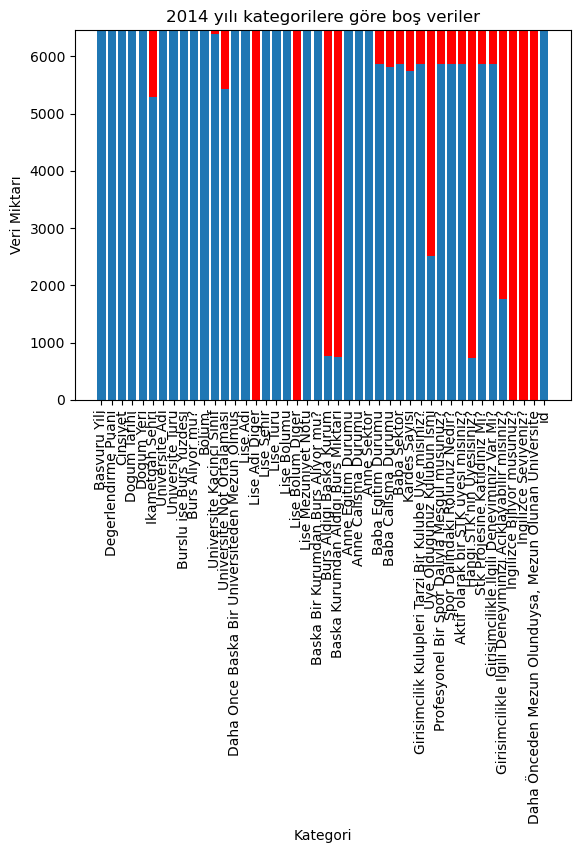

Basvuru Yili: 2015-----------------------------


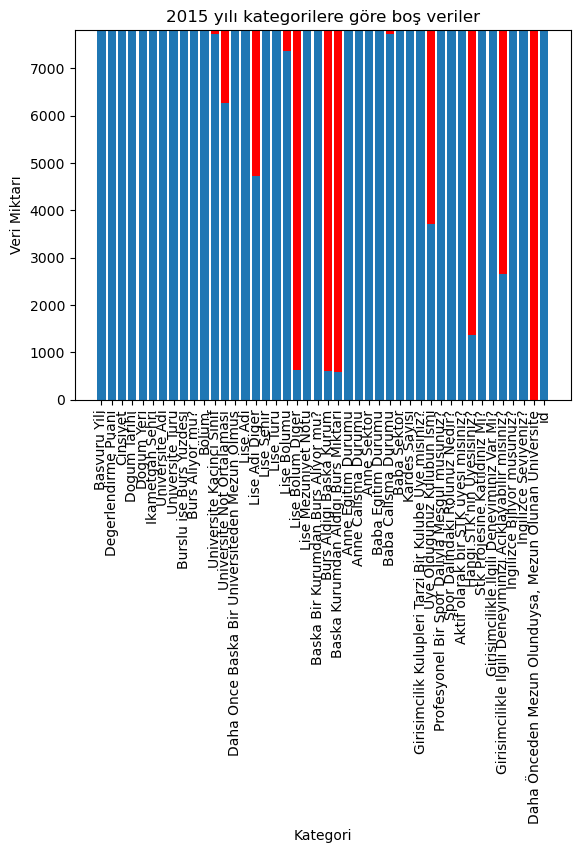

Basvuru Yili: 2016-----------------------------


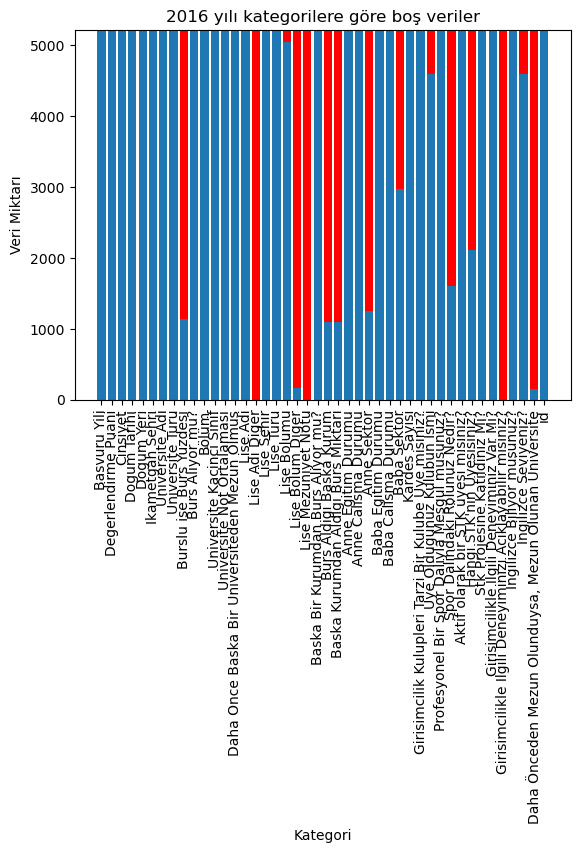

Basvuru Yili: 2017-----------------------------


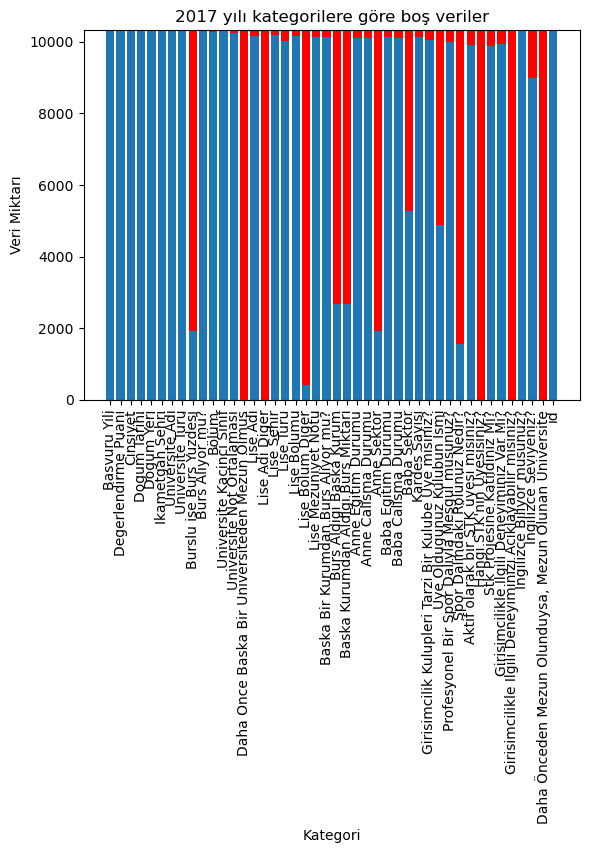

Basvuru Yili: 2018-----------------------------


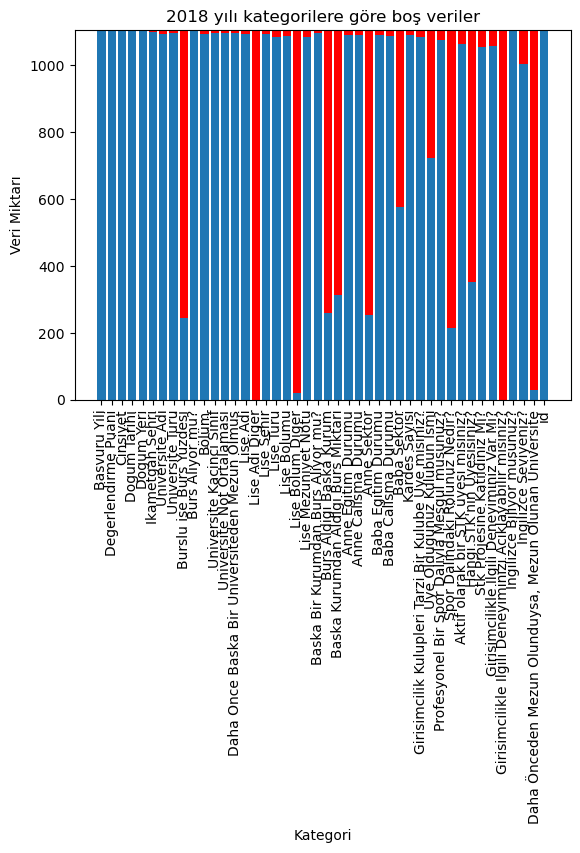

Basvuru Yili: 2019-----------------------------


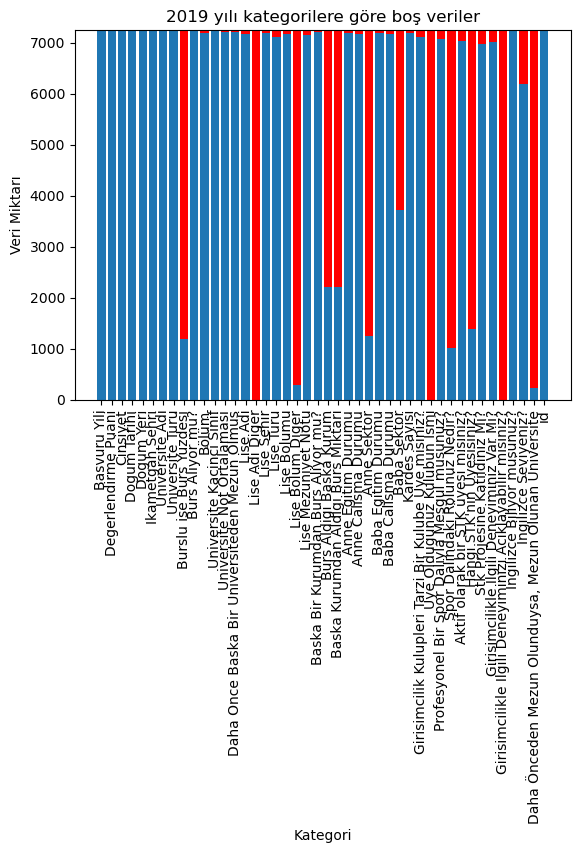

Basvuru Yili: 2020-----------------------------


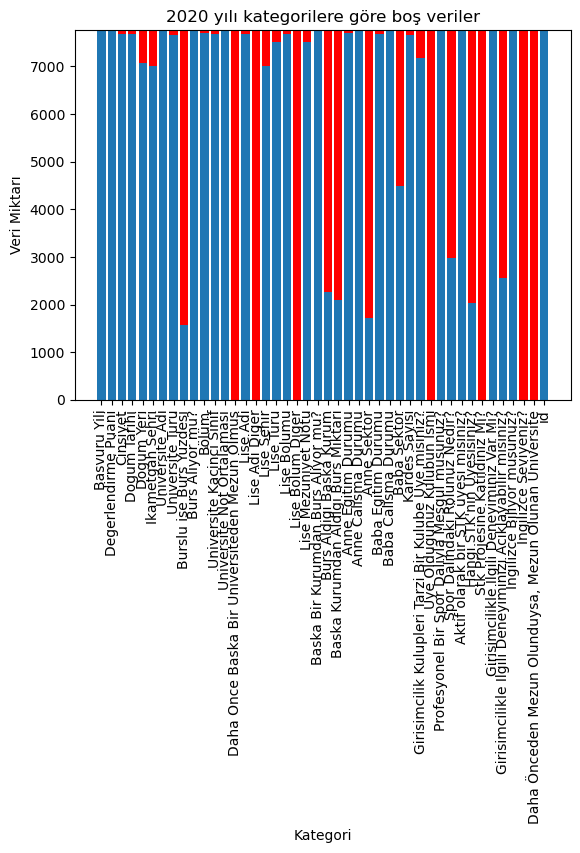

Basvuru Yili: 2021-----------------------------


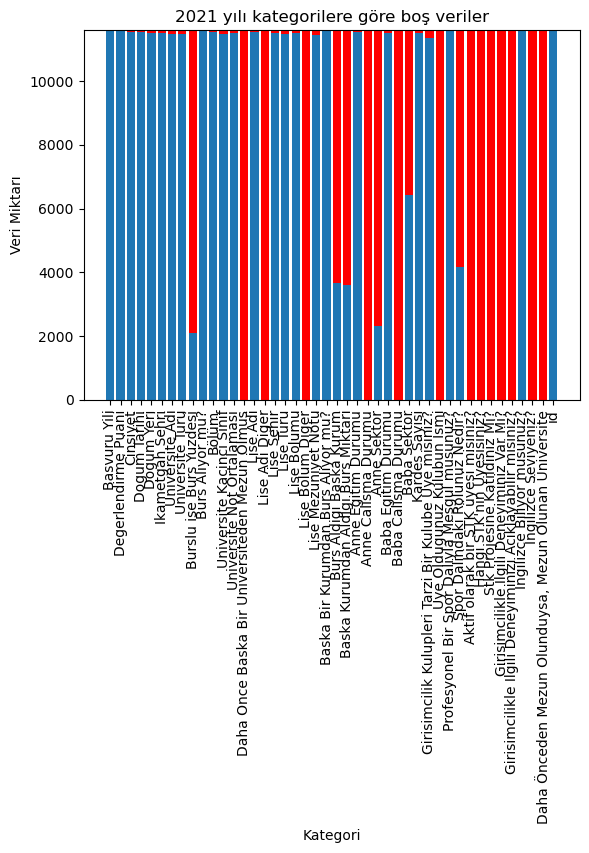

Basvuru Yili: 2022-----------------------------


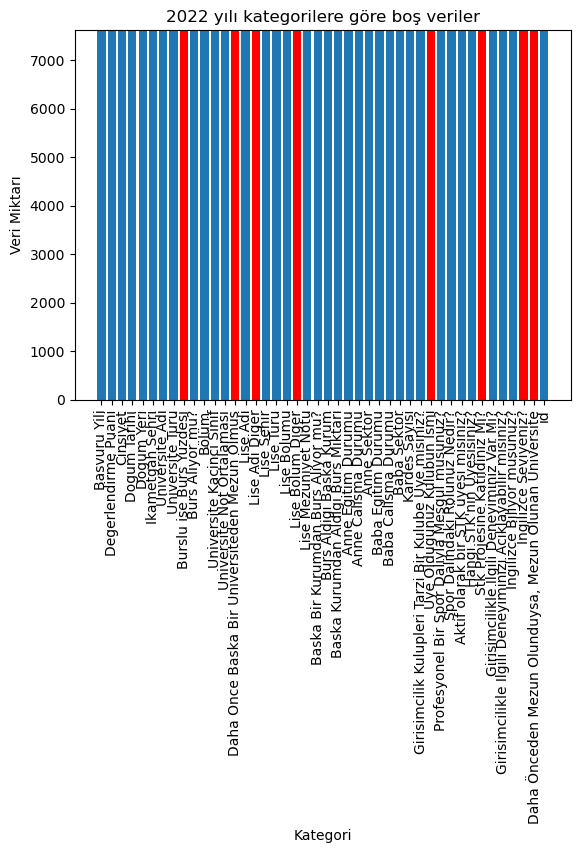

In [885]:
import matplotlib.pyplot as plt
df_raw_basvuru_yili_datetime = pd.to_datetime(df_raw['Basvuru Yili'], format='%Y')
for i in df_raw_basvuru_yili_datetime.dt.year.unique():
        print(f'Basvuru Yili: {i}-----------------------------')
        plt.title(f"{i} yılı kategorilere göre boş veriler")
        plt.xlabel("Kategori")
        plt.ylabel("Veri Miktarı")
        plt.xticks(rotation = 90)
        #plt.figure(figsize=(6, 6))
        plt.bar(df_raw.columns, 
                len(df_raw.loc[df_raw_basvuru_yili_datetime.dt.year== i])-df_raw.loc[df_raw_basvuru_yili_datetime.dt.year == i, df_raw.columns].isna().sum(),
                width=0.8
               )
    
        plt.bar(df_raw.columns,
                df_raw.loc[df_raw_basvuru_yili_datetime.dt.year == i, df_raw.columns].isna().sum(),
                bottom= len(df_raw.loc[df_raw_basvuru_yili_datetime.dt.year== i])-df_raw.loc[df_raw_basvuru_yili_datetime.dt.year == i, df_raw.columns].isna().sum(),
                color='red',
                width=0.8
                )
        plt.show()
            #print(j,':', df_raw.loc[df_raw_basvuru_yili_datetime.dt.year == i, j].isna().sum())
                

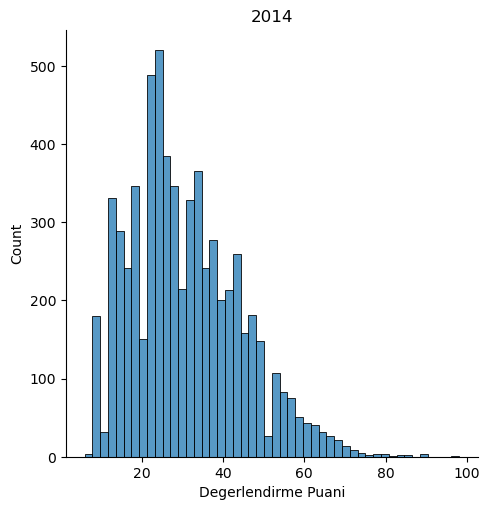

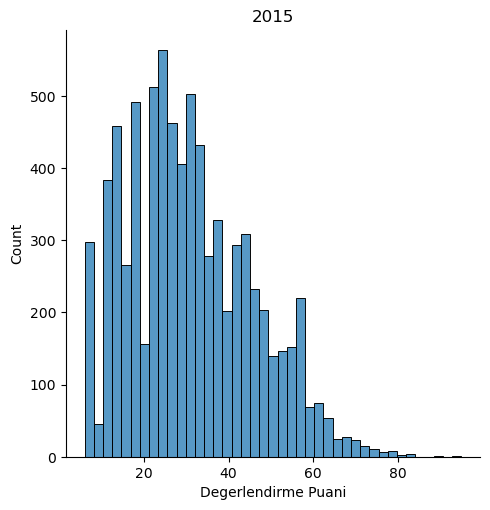

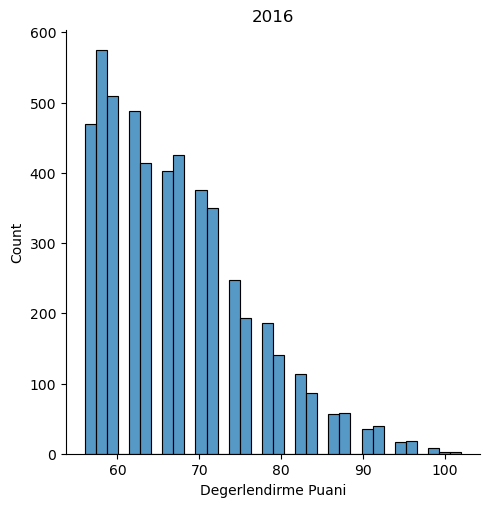

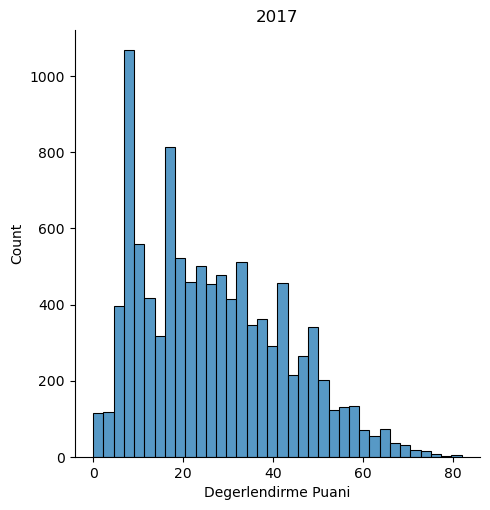

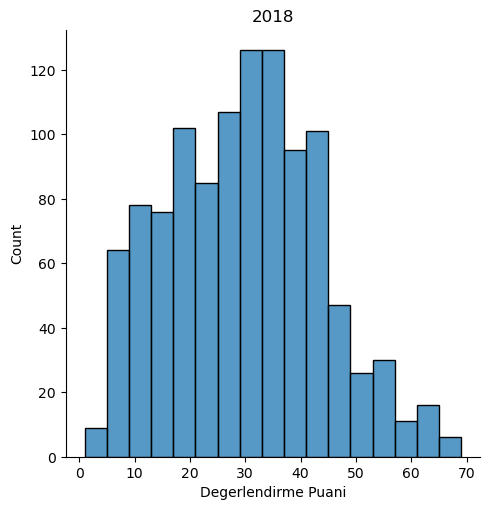

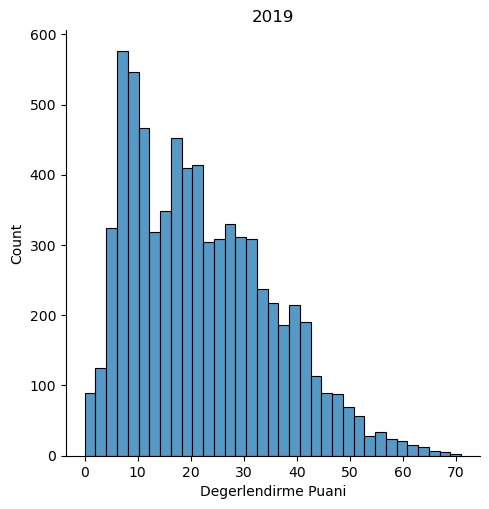

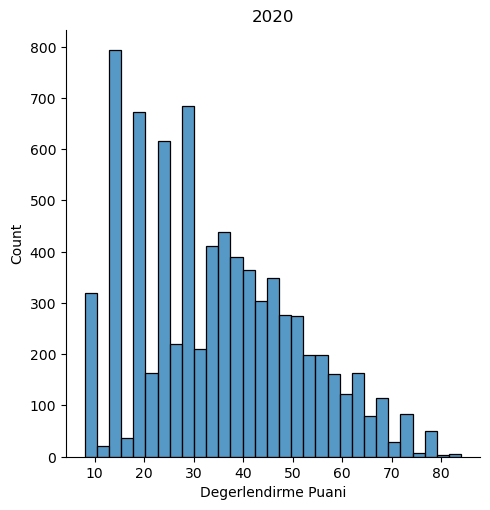

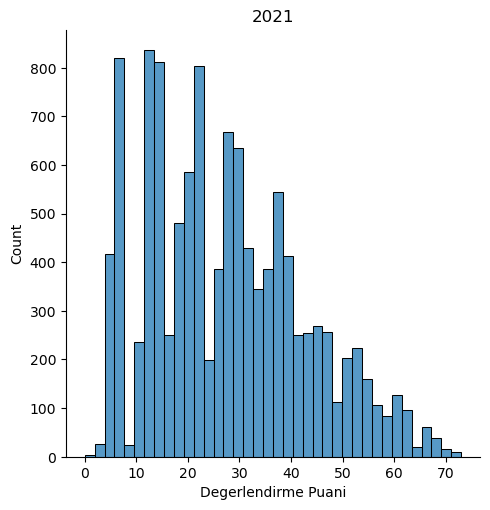

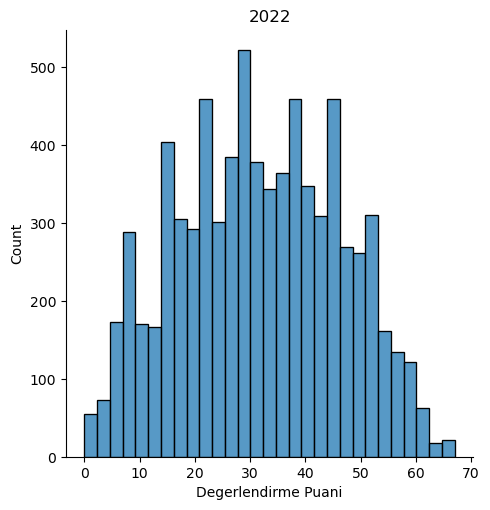

In [886]:
import seaborn as sns
for i in df_raw["Basvuru Yili"].unique():
    sns.displot(data=df_raw[df_raw["Basvuru Yili"]==i],x="Degerlendirme Puani",)
    plt.title(i)
    

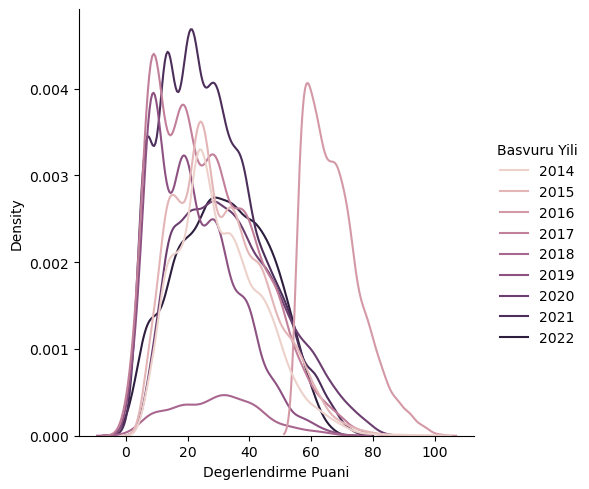

In [887]:
sns.displot(data=df_raw,x="Degerlendirme Puani", hue="Basvuru Yili",kind="kde")

In [888]:
df_2016= df2.loc[df2["Basvuru Yili"].dt.year==2016]
df_2016

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite_missing_2021",Burslu ise Burs Yuzdesi_missing_2022,Daha Once Baska Bir Universiteden Mezun Olmus_missing_2022,Lise Adi Diger_missing_2022,Lise Bolum Diger_missing_2022,Uye Oldugunuz Kulubun Ismi_missing_2022,Stk Projesine Katildiniz Mi?_missing_2022,Ingilizce Seviyeniz?_missing_2022,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite_missing_2022",yas
1210,2016-01-01,56.0,erkek,1995-02-12,mersin,mersin,toros üniversitesi,özel,100.0,evet,...,1,0,0,1,1,1,0,0,1,21
1211,2016-01-01,80.0,kadın,1996-09-23,mersin,i̇stanbul,özyeğin üniversitesi,özel,100.0,evet,...,1,0,0,1,1,0,0,0,1,20
1212,2016-01-01,64.0,kadın,1996-02-16,manisa,i̇stanbul,yeditepe üniversitesi,özel,100.0,evet,...,1,0,0,1,1,0,0,0,1,20
1213,2016-01-01,84.0,erkek,1996-09-20,erzincan,i̇stanbul,koç üniversitesi,özel,100.0,evet,...,1,0,0,1,1,0,0,0,1,20
1214,2016-01-01,64.0,kadın,1994-09-17,kırklareli,i̇stanbul,i̇stanbul aydın üniversitesi,özel,100.0,evet,...,1,0,0,1,1,0,0,1,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26501,2016-01-01,80.0,erkek,1995-04-12,adana,i̇stanbul,boğaziçi üniversitesi,devlet,NaN,hayır,...,1,1,0,1,1,0,0,0,1,21
26502,2016-01-01,60.0,erkek,1997-05-26,i̇stanbul,ankara,orta doğu teknik üniversitesi,devlet,NaN,hayır,...,1,1,0,1,1,0,0,0,1,19
26503,2016-01-01,64.0,erkek,1996-03-14,hatay,i̇zmir,ege üniversitesi,devlet,NaN,hayır,...,1,1,0,1,1,1,0,0,1,20
26504,2016-01-01,70.0,erkek,1993-12-29,i̇stanbul,afyonkarahisar,afyon kocatepe üniversitesi,devlet,NaN,hayır,...,1,1,0,1,1,0,0,0,1,23


In [889]:
df2=df2.loc[df2["Basvuru Yili"].dt.year!=2016]

In [890]:
drop_list = ["Dogum Tarihi", "Basvuru Yili", "Burslu ise Burs Yuzdesi", "Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite", 
          "Lise Adi", "Lise Adi Diger", 'Hangi STK\'nin Uyesisiniz?', "Bölüm", 'Ingilizce Seviyeniz?','Lise Bolum Diger',
         'Uye Oldugunuz Kulubun Ismi', 'Stk Projesine Katildiniz Mi?', 'Daha Once Baska Bir Universiteden Mezun Olmus']

df2.drop(drop_list, axis=1,inplace= True)

/tmp/ipykernel_12419/2244362710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(drop_list, axis=1,inplace= True)


In [891]:
for i in drop_list:
    df2.drop(df2.columns[(df2.columns.str.contains('missing')) & (df2.columns.str.contains(i))],axis=1,inplace=True)

/tmp/ipykernel_12419/3527511277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.columns[(df2.columns.str.contains('missing')) & (df2.columns.str.contains(i))],axis=1,inplace=True)


In [892]:
#numeric categoric
def capture_cols(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = capture_cols(df2)

Observations: 55080
Variables: 43
cat_cols: 35
num_cols: 4
cat_but_car: 4
num_but_cat: 11


## burdan sonrası test

In [893]:
df2.shape

(55080, 43)

In [894]:
test.shape

(11049, 31)

In [903]:
test = pd.read_csv("test_x.csv")

In [904]:
for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = test[col].str.lower()

In [905]:
train_egitim = {
    'yuksek lisans': "yüksek lisans",
    'universite': "üniversite",
    'egitimi yok': "eğitimi yok",
    'ilkokul': "ilkokul"
}

test['Anne Egitim Durumu'] = test['Anne Egitim Durumu'].str.replace('ı', 'i', regex=False)
test['Anne Egitim Durumu'] = test['Anne Egitim Durumu'].apply(
        lambda x: unicodedata.normalize('NFKD', x.strip()).encode('ASCII', 'ignore').decode('ASCII')
)
test['Anne Egitim Durumu'] = test['Anne Egitim Durumu'].replace(train_egitim)


test['Baba Egitim Durumu'] = test['Baba Egitim Durumu'].str.replace('ı', 'i', regex=False)
test['Baba Egitim Durumu'] = test['Baba Egitim Durumu'].apply(
        lambda x: unicodedata.normalize('NFKD', x.strip()).encode('ASCII', 'ignore').decode('ASCII')
)
test['Baba Egitim Durumu'] = test['Baba Egitim Durumu'].replace(train_egitim)

test["Yas"] = test["Basvuru Yili"] - pd.to_datetime(test["Dogum Tarihi"]).dt.year
test.loc[test['Burs Aldigi Baska Kurum'] != '-', 'Burs Aldigi Baska Kurum'] = 'evet'
test.loc[test['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] != "-", 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = 'evet'
test["Kardes Sayisi"] = test["Kardes Sayisi"].astype(int)

test = test.drop(drop_list ,axis=1)

/tmp/ipykernel_12419/3929698424.py:21: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test["Yas"] = test["Basvuru Yili"] - pd.to_datetime(test["Dogum Tarihi"]).dt.year


## Son Kontrol

In [906]:
for i in df2.drop(['Degerlendirme Puani'],axis=1).columns:
    print(
            i,";",np.array_equal(sorted(map(str, df2[i].unique())), sorted(map(str, test[i].unique()))),
        ";",sorted(map(str, df2[i].unique())),";", sorted(map(str, test[i].unique()))
        )

Cinsiyet ; True ; ['belirtmek istemiyorum', 'erkek', 'kadın'] ; ['belirtmek istemiyorum', 'erkek', 'kadın']
Dogum Yeri ; False ; ['adana', 'adıyaman', 'afyonkarahisar', 'aksaray', 'amasya', 'ankara', 'antalya', 'ardahan', 'artvin', 'aydın', 'ağrı', 'balıkesir', 'bartın', 'batman', 'bayburt', 'bilecik', 'bingöl', 'bitlis', 'bolu', 'burdur', 'bursa', 'denizli', 'diyarbakır', 'düzce', 'edirne', 'elazığ', 'erzincan', 'erzurum', 'eskişehir', 'gaziantep', 'giresun', 'gümüşhane', 'hakkâri', 'hatay', 'isparta', 'iğdır', 'i̇stanbul', 'i̇zmir', 'kahramanmaraş', 'karabük', 'karaman', 'kars', 'kastamonu', 'kayseri', 'kilis', 'kocaeli', 'konya', 'kosova', 'kütahya', 'kırklareli', 'kırıkkale', 'kırşehir', 'malatya', 'manisa', 'mardin', 'mersin', 'muğla', 'muş', 'nevşehir', 'niğde', 'ordu', 'osmaniye', 'rize', 'sakarya', 'samsun', 'siirt', 'sinop', 'sivas', 'tekirdağ', 'tokat', 'trabzon', 'tunceli', 'uşak', 'van', 'yalova', 'yozgat', 'yurt dışı', 'zonguldak', 'çanakkale', 'çankırı', 'çorum', 'şanlıur

KeyError: 'Ingilizce Biliyor musunuz?_missing_2014'

### ____________________________________
  < burdan öncesini elleşme sal bana >
   ------------------------------------
          \   ^__^
           \  (oo)\_______
              (__)\       )\/\
                  ||----w |
                  ||     ||

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [ ]:
test["Universite Kacinci Sinif"].unique()

In [ ]:
#label_enc_cols = ["Universite Kacinci Sinif", "Universite Not Ortalaması", 
#                  "Lise Mezuniyet Notu", "Baska Kurumdan Aldigi Burs Miktari", 
#                  "Anne Egitim Durumu", "Baba Egitim Durumu"]

sinif_map_train = {
'hazırlık': 0,
'0': 0,
'1': 1,
'2': 2,
'3': 3,
'4': 4,
'5': 5,
'6': 6,
'mezun': 7,
'yüksek lisans': 8,
}

uni_not_map_train = {
'hazırlığım': 0,
'0 - 1.79': 1,
'1.80 - 2.49': 2,
'2.50 - 2.99': 3,
'3.00 - 3.49': 4,
'3.00 - 4.00': 5,
'3.50 - 4.00': 6
}

lise_not_map_train = {
'0 - 24': 0,
'25 - 49': 1,
'50 - 74': 2,
'75 - 100': 3
}

burs_miktar_map_train = {
'-': 0,
'0 - 499 ₺': 1,
'500₺ - 999₺': 2,
'1000₺ ve üstü': 3
}

annebaba_egitim_map_train = {
'eğitimi yok': 0,
'ilkokul': 1,
'ortaokul': 2,
'lise': 3,
'üniversite': 4,
'yüksek lisans': 5,
'doktora': 6,
'yüksek lisans / doktora': 7
}

# train
df2["Universite Kacinci Sinif"] = df2["Universite Kacinci Sinif"].replace(sinif_map_train)
df2["Universite Not Ortalaması"] = df["Universite Not Ortalaması"].replace(uni_not_map_train)
df2["Lise Mezuniyet Notu"] = df2["Lise Mezuniyet Notu"].replace(lise_not_map_train)
df2["Baska Kurumdan Aldigi Burs Miktari"] = df2["Baska Kurumdan Aldigi Burs Miktari"].replace(burs_miktar_map_train)
df2["Anne Egitim Durumu"] = df2["Anne Egitim Durumu"].replace(annebaba_egitim_map_train)
df2["Baba Egitim Durumu"] = df2["Baba Egitim Durumu"].replace(annebaba_egitim_map_train)

#test
test["Universite Kacinci Sinif"] = test["Universite Kacinci Sinif"].replace(sinif_map_train)
test["Universite Not Ortalaması"] = test["Universite Not Ortalaması"].replace(uni_not_map_train)
test["Lise Mezuniyet Notu"] = test["Lise Mezuniyet Notu"].replace(lise_not_map_train)
test["Baska Kurumdan Aldigi Burs Miktari"] = test["Baska Kurumdan Aldigi Burs Miktari"].replace(burs_miktar_map_train)
test["Anne Egitim Durumu"] = test["Anne Egitim Durumu"].replace(annebaba_egitim_map_train)
test["Baba Egitim Durumu"] = test["Baba Egitim Durumu"].replace(annebaba_egitim_map_train)


In [ ]:
def one_hot_encoder(dataframe, ohe_col):
    ohe = OneHotEncoder()
    dataframe[ohe_col] = ohe.fit_transform(dataframe[ohe_col])
    return dataframe

def standard_scaler(dataframe, num_cols):
    std_scaler = StandardScaler()
    dataframe[num_cols] = std_scaler.fit_transform(dataframe[num_cols])
    return dataframe

other_cols = df2.columns.difference(label_enc_cols)
ohe_cols = other_cols.intersection(cat_cols)

df2 = one_hot_encoder(df2, ohe_cols)
df2 = standard_scaler(df2, num_cols)

In [ ]:
X = df2.drop(['Degerlendirme Puani', "id"], axis=1)
y = df2['Degerlendirme Puani']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=17),
    'Random Forest Regressor': RandomForestRegressor(random_state=17),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=17),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=17),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=17),
    'Extreme Gradient Boosting': XGBRegressor(random_state=17),
    'Light Gradient Boosting Machine': LGBMRegressor(random_state=17),
    'CatBoost Regressor': CatBoostRegressor(random_state=17),
}

params = {
    "Gradient Boosting Regressor": {
        "learning_rate": [0.01],
        "max_depth": [3, 5, 8],
        "max_features": ["auto", "sqrt", "log2"],
        "n_estimators": [100, 200, 400, 700],
        "subsample": [1, 0.8]
    },
    "Random Forest Regressor": {
        "max_depth": [3, 5, 8],
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2, 5, 10],
        "n_estimators": [100, 200, 400, 700]
    },
    "Extra Trees Regressor": {
        "n_estimators": [100, 200, 400, 700],
        "max_depth": [3, 5, 8],
        "min_samples_split": [2, 5, 10],
        "max_features": ["auto", "sqrt", "log2"],
    },
    "AdaBoost Regressor": {
        "learning_rate": [0.01],
        "n_estimators": [100, 200, 400, 700],
        "loss": ['linear', 'square', 'exponential']
    },
    "Decision Tree Regressor": {
        "max_depth": [3, 5, 8],
        "min_samples_split": [2, 5, 10],
        "max_features": ["auto", "sqrt", "log2"],
    },
    "Extreme Gradient Boosting": {
        "colsample_bytree": [1, 0.7],
        "learning_rate": [0.01],
        "max_depth": [3, 5, 8],
        "n_estimators": [100, 200, 400, 700],
        "subsample": [1, 0.8]
    },
    "Light Gradient Boosting Machine": {
        "colsample_bytree": [1, 0.7],
        "learning_rate": [0.01],
        "max_depth": [3, 5, 8],
        "n_estimators": [100, 200, 400, 700],
        "num_leaves": [3, 7]
    },
    "CatBoost Regressor": {
        "learning_rate": [0.01],
        "max_depth": [3, 5, 8],
        "n_estimators": [100, 200, 400, 700],
        "subsample": [1, 0.8]
    }
}

def train(models, X, y, test_size=0.2, cv=5):

  results = {}
  params = {}

  for i, (model_name, model) in enumerate(models.items()):

    params[model_name] = model.get_params()

    scoring = {
        "neg_mean_squared_error": make_scorer(mean_squared_error),
    }

    results[model_name] = {"RMSE": np.mean(np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error")))}

  return results, params
        
def training_results(results):

  results_df = pd.DataFrame(results).T

  return results_df

results, params = train(models, params, X, y)
training_results(results)

In [ ]:
def hyperparameter_tuning(models, params, X, y, cv=5, random_state=17):

  results = {}
  best_model = None
  best_score = 0

  for model_name, model in models.items():

    if model_name not in params:
      print(f"{model_name} does not require hyperparameters.")
      continue

    print(f"Performing Hyperparameter Tuning for {model_name}...")

    gs_cv = GridSearchCV(model, params[model_name], cv=cv, n_jobs=-1, verbose=False).fit(X, y)
    gs_final = model.set_params(**gs_cv.best_params_, random_state=random_state).fit(X, y)

    best_params = gs_cv.best_params_
    score = gs_cv.best_score_

    if score > best_score:
      best_score = score
      best_model = gs_final

    scoring = {
        "neg_mean_squared_error": make_scorer(mean_squared_error)
    }

    results[model_name] = {
            'Best Parameters': best_params,
            "RMSE": np.mean(np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error")))
    }

    print(f"{model_name} - Best Parameters: {best_params}")

  return results, gs_final, best_model

hyper_results, gs_final, best_model = hyperparameter_tuning(models, params, X, y)
print(f"\nThe model with the best score is {best_model}\n")
train_results(hyper_results)

In [ ]:
def plot_learning_curve(estimator, title, X, y, train_sizes = np.linspace(.1, 1.0, 5), scoring="neg_mean_squared_error"):
    
  train_sizes, train_scores, test_scores = learning_curve(gs_final, X, y,
                                                          cv=5, scoring=scoring,
                                                          n_jobs=-1, train_sizes=train_sizes)
  plt.figure()
  plt.title(title)

  plt.xlabel('Number of Training Samples')
  plt.ylabel('Score')

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1,
                   color="r")

  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha = 0.1, color = "g")

  plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
           label = "Training score")

  plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
           label = "Cross-validation score")

  plt.legend(loc = "best")
  plt.show

plot_learning_curve(best_model, "Learning Curve For Best Model", x, y)

In [ ]:
!git add .
!git commit -m "berke<3doa"
!git push